# Librairies

------

In [ ]:
import sys
sys.version

'3.7.13 (default, Apr 24 2022, 01:04:09) \n[GCC 7.5.0]'

In [ ]:
import os
import sys
import random
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import utils.outils as utils
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, Normalizer

# Données

--------------

In [ ]:
# Give path of the data here
path = "data/..."

# Par défaut le couple est définie par la letter 'c', a changer le cas échéant
TORQUE = 'c'

# Load file
df = pd.read_csv(path)

# Obtenir le découpage en période d'activité == vitesse non-nulle
periodes = utils.activites_periodes(df)

# Tout faire passer en valeur absolue, par défaut le couple est définie par la letter 'c'
df[TORQUE] = abs(df.c.values)
df.head()

Fin !


,Unnamed: 0,Unnamed: 0.1,Time,c,v,angular position,label,file
0,0,0,2022-02-01 09:08:51.421,15.706791,0.0,0.0,0,eti/sangomar//Swivel unit#1 STEP 2
1,1,1,2022-02-01 09:08:51.431,15.701229,0.0,0.0,0,eti/sangomar//Swivel unit#1 STEP 2
2,2,2,2022-02-01 09:08:51.441,15.668140,0.0,0.0,0,eti/sangomar//Swivel unit#1 STEP 2
3,3,3,2022-02-01 09:08:51.451,15.674537,0.0,0.0,0,eti/sangomar//Swivel unit#1 STEP 2
4,4,4,2022-02-01 09:08:51.461,15.740713,0.0,0.0,0,eti/sangomar//Swivel unit#1 STEP 2


----------

--------

# Nombre de points concernant une période d'activité
  * Premier modèle qui distingue le statique de ce qui est une periodes d'activité
  * Deuxième modèle sur la période d'activité découverte par le 1er, distinguer BO et RI

In [ ]:
# Commencer par traduire cela : BO et RI = 1 et RE et ST = 0
df['activite'] = df.label.apply(lambda x : 1 if (x > 0) else(0))

In [ ]:
df[periodes[0][0] : periodes[0][1]].loc[df.label == 1, :]

,Unnamed: 0,Time,c,v,angular position,label,file,activite
3268,3268,2022-02-01 09:09:24.101,15.982901,0.129694,0.0,1,eti/sangomar//Swivel unit#1 STEP 2,1
3269,3269,2022-02-01 09:09:24.111,16.556528,0.161208,0.0,1,eti/sangomar//Swivel unit#1 STEP 2,1
3270,3270,2022-02-01 09:09:24.121,17.265848,0.192722,0.0,1,eti/sangomar//Swivel unit#1 STEP 2,1
3271,3271,2022-02-01 09:09:24.131,17.941244,0.224237,0.0,1,eti/sangomar//Swivel unit#1 STEP 2,1
3272,3272,2022-02-01 09:09:24.141,18.779305,0.255751,0.0,1,eti/sangomar//Swivel unit#1 STEP 2,1
...,...,...,...,...,...,...,...,...
3397,3397,2022-02-01 09:09:25.391,340.039795,0.581804,0.0,1,eti/sangomar//Swivel unit#1 STEP 2,1
3398,3398,2022-02-01 09:09:25.401,338.888916,0.584228,0.0,1,eti/sangomar//Swivel unit#1 STEP 2,1
3399,3399,2022-02-01 09:09:25.411,337.855957,0.586652,0.0,1,eti/sangomar//Swivel unit#1 STEP 2,1
3400,3400,2022-02-01 09:09:25.421,336.847717,0.587864,0.0,1,eti/sangomar//Swivel unit#1 STEP 2,1


In [ ]:
df[periodes[0][0] : periodes[0][1]].loc[df.label == 0, :]

,Unnamed: 0,Time,c,v,angular position,label,file,activite
3256,3256,2022-02-01 09:09:23.981,15.683434,0.006060,0.0,0,eti/sangomar//Swivel unit#1 STEP 2,0
3257,3257,2022-02-01 09:09:23.991,15.705678,0.012121,0.0,0,eti/sangomar//Swivel unit#1 STEP 2,0
3258,3258,2022-02-01 09:09:24.001,15.730146,0.018181,0.0,0,eti/sangomar//Swivel unit#1 STEP 2,0
3259,3259,2022-02-01 09:09:24.011,15.710684,0.024242,0.0,0,eti/sangomar//Swivel unit#1 STEP 2,0
3260,3260,2022-02-01 09:09:24.021,15.681210,0.030302,0.0,0,eti/sangomar//Swivel unit#1 STEP 2,0
...,...,...,...,...,...,...,...,...
12985,12985,2022-02-01 09:11:01.271,17.962656,0.000000,30.0,0,eti/sangomar//Swivel unit#1 STEP 2,0
12986,12986,2022-02-01 09:11:01.281,17.972666,0.000000,30.0,0,eti/sangomar//Swivel unit#1 STEP 2,0
12987,12987,2022-02-01 09:11:01.291,17.958485,0.000000,30.0,0,eti/sangomar//Swivel unit#1 STEP 2,0
12988,12988,2022-02-01 09:11:01.301,17.927898,0.000000,30.0,0,eti/sangomar//Swivel unit#1 STEP 2,0


In [ ]:
# Ensuite selectionner des données
utils.barplot_viz(df, 'activite')

On a peu de points en statique, mais il faut se rappeler qu'on a aggregé +s fichier ensemble en ignorant les fichiers où il n'y avait pas de mouvement ou couper quand on avait une longe période de pause.

In [ ]:
utils.barplot_viz(df, 'label')

On a majoritairement du running, un peu de bo (= 30taine de points à 100Hz), le label 3 est du résiduel (pas pris en compte dans l'étude)

# Petit test de la librairie ruptures (https://centre-borelli.github.io/ruptures-docs/)

In [ ]:
!pip install ruptures

     |████████████████████████████████| 991 kB 29.5 MB/s 


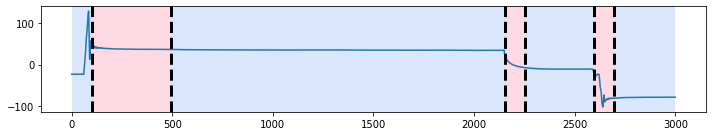

In [ ]:
import ruptures as rpt
import warnings

#cfg = tsfel.get_features_by_domain()

fts = ['0_Kurtosis', '0_Max', '0_Mean', '0_Mean absolute deviation',
       '0_Median', '0_Min', '0_Root mean square', '0_Skewness', '0_Variance',
       '0_Absolute energy', '0_Mean absolute diff', '0_Median absolute diff',
       '0_Slope']

curr_pos = 0
win = 3000
y_pred = []
with warnings.catch_warnings():
    
    warnings.simplefilter('ignore')
    
    bo, ri = False, False
    while curr_pos < 3000:

        t = 0
        x = df.loc[curr_pos : curr_pos + win, 'c'].values

        # Detection of change point - Region proposal
        algo = rpt.Pelt(model="rbf", jump = 5, min_size = 100).fit(x)
        result = algo.predict(pen=30)
        
        curr_pos += 3000

        # display
        rpt.display(x, result, result)
        plt.show()

In [ ]:
print(result)

[100, 495, 2155, 2255, 2595, 2695, 3001]


# Features Extraction

* Drop unwanted column


In [ ]:
# Donnée liste des colonnes a retirer 
drops = ["Unnamed: 0",	"Unnamed: 0.1"]

# errors = 'ignore', permet de spécifier de jeter l'erreur si colonne designé n'existe pas 
df.drop(labels = drops, axis = 1, inplace = True, errors='ignore'))
df

,Time,c,v,angular position,label,file
0,2022-02-01 09:08:51.421,15.706791,0.0,0.0,0,eti/sangomar//Swivel unit#1 STEP 2
1,2022-02-01 09:08:51.431,15.701229,0.0,0.0,0,eti/sangomar//Swivel unit#1 STEP 2
2,2022-02-01 09:08:51.441,15.668140,0.0,0.0,0,eti/sangomar//Swivel unit#1 STEP 2
3,2022-02-01 09:08:51.451,15.674537,0.0,0.0,0,eti/sangomar//Swivel unit#1 STEP 2
4,2022-02-01 09:08:51.461,15.740713,0.0,0.0,0,eti/sangomar//Swivel unit#1 STEP 2
...,...,...,...,...,...,...
7045833,2022-05-13 11:14:09.567,-8.334481,0.0,0.0,0,eti/sangomar//Swivel unit#9 STEP 6 & 7
7045834,2022-05-13 11:14:09.577,-8.330378,0.0,0.0,0,eti/sangomar//Swivel unit#9 STEP 6 & 7
7045835,2022-05-13 11:14:09.587,-8.325818,0.0,0.0,0,eti/sangomar//Swivel unit#9 STEP 6 & 7
7045836,2022-05-13 11:14:09.597,-8.323234,0.0,0.0,0,eti/sangomar//Swivel unit#9 STEP 6 & 7


* Définir features à haute variance d'après études

In [ ]:
# D'après feature extractable
fts = ['0_Kurtosis', '0_Max', '0_Mean', '0_Mean absolute deviation','0_Median', '0_Median absolute deviation', '0_Min',
'0_Root mean square', '0_Skewness', '0_Standard deviation',
'0_Variance', '0_Absolute energy',
'0_Entropy','0_Mean absolute diff', '0_Mean diff', '0_Median absolute diff','0_Median diff', '0_Negative turning points',
       '0_Neighbourhood peaks', '0_Peak to peak distance',
       '0_Positive turning points', '0_Signal distance', '0_Slope',
       '0_Sum absolute diff', '0_Total energy', '0_Zero crossing rate']

* Libs a installer si necessaire

In [ ]:
!pip install tsfel
!pip install ruptures

* Transformation des données brutes ---> fts, en créant un nouveau dataframe   
    * DF = [start, end, label, list_fts]
    * start : début d'une période
    * end : fin période
    * label : label sur la période start-->end

* List features extractable par tsfel

In [6]:
import tsfel
import ruptures as rpt

tsfel.get_features_by_domain().keys()

dict_keys(['spectral', 'statistical', 'temporal'])

* Détail complet

In [ ]:
tsfel.get_features_by_domain()

* C'est parti !

In [ ]:
from matplotlib.ticker import FormatStrFormatter

# DéfinirCols of Dataframe
cols = ["start", "end", 'label'] + fts

# New dataframe
X_fts = pd.DataFrame(columns = cols)

# Obtenir la liste de features calculable
cfg = tsfel.get_features_by_domain()

# 1st label
label = df.loc[0, 'label']

i, j = 0, 1
while j < df.shape[0]:
  
  # do
  if df.loc[j, "label"] != label:

      print(i, j)
      start, end = df.loc[i, 'Time'], df.loc[j-1, 'Time']
      x = df.loc[i:j, 'c']

      if len(list(x)) < 12:
          label = df.loc[j, 'label']
          i = j
          continue
      
      # Calculer features
      s = tsfel.time_series_features_extractor(cfg, list(x), verbose = 0)

      # Par défaut tsfel.time_series_features_extractor renvoit toutes les features possible (spectral', 'statistical', 'temporal) --> Conserver que celles qui m'intérrese
      ss = s[fts].values

      # Insérer dans le nouvaeu Dataframe
      X_fts = X_fts.append(pd.Series([start, end, label] + list(ss[0]), index = X_fts.columns), ignore_index = True)

      # Màj index + label
      label = df.loc[j, 'label']
      i = j

  else:

      j += 1

0 3268
3268 3402


<ipython-input-17-06e44fdf66d8>:34: UserWarning:

Using default sampling frequency set in configuration file.



3402 9994
9994 10040
10040 12997
12997 13210
13210 19720
19720 19762
19762 22724
22724 22923
22923 29453
29453 29494
29494 32459
32459 32643
32643 39184
39184 39225
39225 42191
42191 42360
42360 48926
48926 48962
48962 51926
51926 52110
52110 58651
58651 58691
58691 61659
61659 61863
61863 68383
68383 68422
68422 71388
71388 71584
71584 78118
78118 78155
78155 81121
81121 81310
81310 87849
87849 87890
87890 90858
90858 91041
91041 97585
97585 97624
97624 100590
100590 100773
100773 107307
107307 107338
107338 110308
110308 110501
110501 117024
117024 117057
117057 120023
120023 120236
120236 126747
126747 126788
126788 129753
129753 129971
129971 136480
136480 136513
136513 139480
139480 139676
139676 146201
146201 146235
146235 149205
149205 149416
149416 155934
155934 155967
155967 158939
158939 159159
159159 165655
165655 165685
165685 168652
168652 168874
168874 175389
175389 175415
175415 178385
178385 178586
178586 185117
185117 185144
185144 188116
188116 188333
188333 194841
19

* Version bourrin

In [ ]:
#Xbo, Xri = [], []
idxs_bo, idxs_ri = [], []
import tsfel

features = pd.DataFrame(columns = fts + ['label'])

cfg = tsfel.get_features_by_domain()

import warnings
with warnings.catch_warnings():
    
    warnings.simplefilter('ignore')
    
    for (debut, fin) in periodes:
        
        # Extract valeur de couple
        st = abs(df[debut : fin].loc[df['label'] == 0, 'c'].values)
        bo = abs(df[debut : fin].loc[df['label'] == 1, 'c'].values)
        ri = abs(df[debut : fin].loc[df['label'] == 2, 'c'].values)
        re = abs(df[debut : fin].loc[df['label'] == 3, 'c'].values)

        # Get Torque values
        #x_bo, x_ri = abs(bo['c'].values), abs(ri['c'].values)
    
        # Calculer features
        x_st = tsfel.time_series_features_extractor(cfg, st)
        x_bo = tsfel.time_series_features_extractor(cfg, bo)
        x_ri = tsfel.time_series_features_extractor(cfg, ri)
        
        # Conserver que celles qui m'intérrese
        x_st = x_st[fts]
        x_st['label'] = 0
        x_bo = x_bo[fts]
        x_bo['label'] = 1
        x_ri = x_ri[fts]
        x_ri['label'] = 2
    
        # Append au dataframe général
        if len(re) > 12: # condition dans lpcc(signal, n_coeff=12) appelé par time_series_features_extractor, if pour ce cas
          x_re = tsfel.time_series_features_extractor(cfg, re)
          x_re = x_re[fts]
          x_re['label'] = 3
          features = pd.concat([features, x_st, x_bo, x_ri, x_re], axis = 0)
        else:
          features = pd.concat([features, x_st, x_bo, x_ri], axis = 0)

features

*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


* See

In [ ]:
X_fts.head()

,start,end,label,0_Kurtosis,0_Max,0_Mean,0_Mean absolute deviation,0_Median,0_Median absolute deviation,0_Min,...,0_Median diff,0_Negative turning points,0_Neighbourhood peaks,0_Peak to peak distance,0_Positive turning points,0_Signal distance,0_Slope,0_Sum absolute diff,0_Total energy,0_Zero crossing rate
0,2022-02-01 09:08:51.421,2022-02-01 09:09:24.091,0,16.578539,15.982901,15.706197,0.013877,15.705956,0.011400,15.596125,...,-0.000278,1066.0,155.0,0.386776,1066.0,3268.933022,5.668201e-08,61.212076,2.467604e+04,0.0
1,2022-02-01 09:09:24.101,2022-02-01 09:09:25.431,1,-1.413426,347.026764,198.778137,101.775100,205.837906,110.928917,15.982901,...,3.152039,0.0,1.0,331.043863,1.0,375.809402,2.907893e+00,343.242990,5.299600e+06,0.0
2,2022-02-01 09:09:25.441,2022-02-01 09:10:31.351,2,3.002637,334.827637,288.362349,5.367616,288.399292,5.225220,276.263000,...,-0.021255,380.0,195.0,58.564636,380.0,6862.422793,2.543525e-03,1612.427032,8.320780e+06,0.0
3,2022-02-01 09:10:31.361,2022-02-01 09:10:31.811,3,-1.087700,299.251251,123.091577,79.102767,93.300163,61.278458,28.048569,...,-6.439072,0.0,0.0,271.202682,0.0,279.623960,-6.398284e+00,271.202682,2.374661e+06,0.0
4,2022-02-01 09:10:31.821,2022-02-01 09:11:01.381,0,15.673375,28.048569,18.225386,0.762043,17.871733,0.104272,17.293653,...,-0.002501,905.0,104.0,10.754915,905.0,2958.148253,-7.094190e-04,59.484386,3.343519e+04,0.0


# Preparer données

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer, OneHotEncoder

X = X_fts.loc[:, fts].values
y = X_fts.loc[:, 'label'].values

X = np.asarray(X).astype(np.float32)
y = np.asarray(y).astype(np.int32)

# Penser a OneHot la sorte pour un problème Multi-classe
Y = np.zeros((y.size, y.max() + 1))
Y[np.arange(y.size), y] = 1

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=777, shuffle = True)

In [ ]:
print(X_train.shape, y_train.shape)

(1624, 26) (1624, 4)


In [ ]:
df.label.unique()

array([0, 1, 2, 3])

- # Charger modèle

In [ ]:
"""model_1DCNN.save("eti/1dcnn-00.h5", include_optimizer=True)"""

In [ ]:
"""from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/My\ Drive/ML/Argos/Argos"""

In [14]:
# load model
from keras.models import Model
from tensorflow.keras.optimizers import Adam
from keras.layers import LSTM, Bidirectional, GlobalMaxPooling1D, Input, Concatenate, Lambda, Dense, Reshape # La couche lambda permet de faire des lambda expression sur les Tenseurs
import keras.backend as K
from keras.models import load_model

model = load_model('model.h5')
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 26, 1)]      0           []                               
                                                                                                  
 lambda_2 (Lambda)              (None, 1, 26)        0           ['input_3[0][0]']                
                                                                                                  
 bidirectional_4 (Bidirectional  (None, 26, 200)     81600       ['input_3[0][0]']                
 )                                                                                                
                                                                                                  
 bidirectional_5 (Bidirectional  (None, 1, 200)      101600      ['lambda_2[0][0]']         

- # Modèle BiLSTM

In [ ]:
from keras.models import Model
from tensorflow.keras.optimizers import Adam
from keras.layers import LSTM, Bidirectional, GlobalMaxPooling1D, Input, Concatenate, Lambda, Dense, Reshape # La couche lambda permet de faire des lambda expression sur les Tenseurs
import keras.backend as K

## Partie II - Init Réseau à convolution

def model_BiLSTM_fts():
    
    # Init Modèle Dual-BRNN

    n_timesteps = X_train.shape[1]
    n_features = 1
    input = Input(shape=(n_timesteps, n_features,))

    # 1er LSTM image gauche -> droite et inversement
    biLSTM1 = Bidirectional(LSTM(units=100, return_state=False, return_sequences=True), merge_mode='concat')
    rnn1    = biLSTM1(input)
    rnn1    = GlobalMaxPooling1D()(rnn1)

    # 1er LSTM image haut -> bas (en faite gauche -> droite sur une image pivoté à 90°)
    biLSTM2 = Bidirectional(LSTM(units=100, return_state=False, return_sequences=True), merge_mode='concat')
    retourn = Lambda(lambda t: K.permute_dimensions(t, pattern=(0, 2, 1)) )
    rnn2    = retourn(input)
    rnn2    = biLSTM2(rnn2)
    rnn2    = GlobalMaxPooling1D()(rnn2)

    # Concatener les 2 réseaux ensemble
    concat = Concatenate(axis=1)
    x      = concat([rnn1, rnn2])

    # Sortie finale
    finale = Dense(len(df.label.unique()), activation="softmax")(x)

    model = Model(inputs=input, outputs=finale)
    
    #◘ Compilation du réseau
    # 1 - Choisir l'algo du gradient
    # 2 - Choisir la fonction de coût
    # 3 - Choisir Métric pour mesurer performance réseau
    
    model.compile(optimizer=Adam(learning_rate = 0.01), 
                        loss="categorical_crossentropy", # loss = 'sparse_categorical_crossentropy, pour ne pas One-hot les cibles et sauver de l'espace
                        metrics=["categorical_accuracy"])

    model.call = tf.function(model.call)
    
    return model

# Création & Summury
bilstm = model_BiLSTM_fts()

bilstm.summary()
###############################################################################

* Training

In [ ]:
from keras.layers import LSTM
from keras.models import Model
from keras.layers import Input, PReLU, Dense, LSTM, CuDNNLSTM, concatenate, Activation
from keras.layers import Conv1D, BatchNormalization, GlobalAveragePooling1D, Permute, Dropout, Permute, MaxPooling1D
from keras.layers import Reshape, Concatenate
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint

earlystopping = EarlyStopping(monitor = 'val_loss', patience = 3,verbose = 1, )
checkpoint = ModelCheckpoint('model/biLSTM.h5', monitor='val_loss',
                             save_best_only=True, save_weights_only=False, mode='auto')

model = model_BiLSTM_fts()

print(X_train.shape, y_train.shape)

# Choix des params
EPOCHS = 10
BACTH_S = 16
"""
Note personnel d'après Y.Lecun:

(in April 2018, Yann Lecun has tweeted :

"Friends don’t let friends use mini-batches larger than 32“). 
A small batch size ensures that each training iteration is very fast, 
and although a large batch size will give a more precise estimate of the gradients, 
in practice this does not matter much since the optimization landscape is quite complex 
and the direction of the true gradients do not point precisely in the direction of the optimum
"""

h = model.fit(X_train.reshape(X_train.shape[0], X_train.shape[1], 1),
              y_train, 
              epochs = EPOCHS, 
              batch_size = BACTH_S,
              validation_split = 0.2,
              callbacks = [earlystopping, checkpoint])

(1624, 26) (1624, 4)
Epoch 1/10
82/82 [==============================] - 10s 51ms/step - loss: 0.2864 - categorical_accuracy: 0.8868 - val_loss: 0.0482 - val_categorical_accuracy: 0.9969
Epoch 2/10
82/82 [==============================] - 2s 27ms/step - loss: 0.0417 - categorical_accuracy: 0.9938 - val_loss: 0.0230 - val_categorical_accuracy: 1.0000
Epoch 3/10
82/82 [==============================] - 2s 28ms/step - loss: 0.0204 - categorical_accuracy: 0.9962 - val_loss: 0.0103 - val_categorical_accuracy: 0.9969
Epoch 4/10
82/82 [==============================] - 3s 38ms/step - loss: 0.0060 - categorical_accuracy: 0.9992 - val_loss: 0.0025 - val_categorical_accuracy: 1.0000
Epoch 5/10
82/82 [==============================] - 3s 32ms/step - loss: 0.0021 - categorical_accuracy: 1.0000 - val_loss: 0.0011 - val_categorical_accuracy: 1.0000
Epoch 6/10
82/82 [==============================] - 2s 27ms/step - loss: 8.6181e-04 - categorical_accuracy: 1.0000 - val_loss: 7.1815e-04 - val_categoric

* Evaluation

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)

print(confusion_matrix( np.argmax(y_test, axis = 1), np.argmax(y_pred, axis = 1) ))
print('Classification Report')
print(classification_report(np.argmax(y_test, axis = 1), np.argmax(y_pred, axis = 1), target_names=["ST", "BO", "RI", "RE"]))

13/13 [==============================] - 0s 24ms/step
[[100   0   0   0]
 [  0 127   0   0]
 [  0   0  97   0]
 [  0   0   0  83]]
Classification Report
              precision    recall  f1-score   support

          ST       1.00      1.00      1.00       100
          BO       1.00      1.00      1.00       127
          RI       1.00      1.00      1.00        97
          RE       1.00      1.00      1.00        83

    accuracy                           1.00       407
   macro avg       1.00      1.00      1.00       407
weighted avg       1.00      1.00      1.00       407



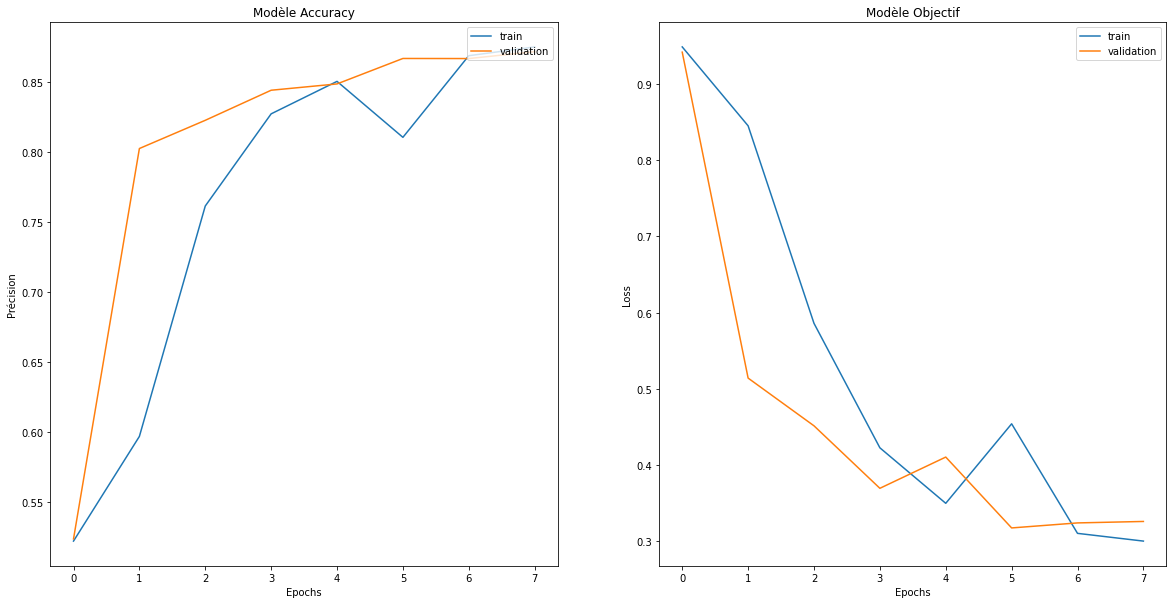

In [ ]:
fig, axs = plt.subplots(1, 2, figsize = (20,10))

axs[0].plot(h.history['categorical_accuracy'])
axs[0].plot(h.history['val_categorical_accuracy'])
axs[0].set_title('Modèle Accuracy')
axs[0].set_ylabel('Précision')
axs[0].set_xlabel('Epochs')
axs[0].legend(['train', 'validation'], loc = 'upper right')

axs[1].plot(h.history['loss'])
axs[1].plot(h.history['val_loss'])
axs[1].set_title('Modèle Objectif')
axs[1].set_ylabel('Loss')
axs[1].set_xlabel('Epochs')
axs[1].legend(['train', 'validation'], loc = 'upper right')

# Test

In [ ]:
periodes = utils.activites_periodes(df)

Fin !


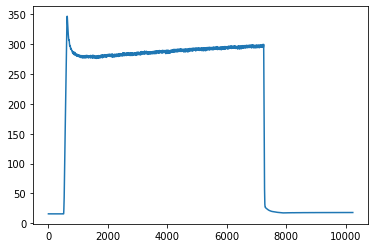

In [ ]:
plt.plot(df.loc[periodes[0][0]-500:periodes[0][1], 'c'].values)

In [ ]:
x = df.loc[periodes[0][0]-500:periodes[0][1], 'c'].values

algo = rpt.Pelt(model="rbf", jump = 5, min_size = 100).fit(x)
result = algo.predict(pen=35)

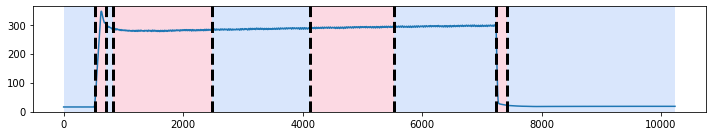

In [ ]:
rpt.display(x, result, result)
plt.show()

In [ ]:
t = 0
pred = []
for d in result:
  
  s = tsfel.time_series_features_extractor(cfg, x[t : d], verbose = 0)

  # Conserver que celles qui m'intérrese
  ss = s[fts].values

  # Predict
  pred.append(model.predict(ss)[0])

  t = d

<ipython-input-35-bba33ebbabca>:5: UserWarning:

Using default sampling frequency set in configuration file.



1/1 [==============================] - 0s 51ms/step


In [ ]:
pred

[array([9.9994659e-01, 1.8997856e-05, 1.0463779e-06, 3.3429547e-05],
       dtype=float32),
 array([1.34966185e-05, 9.99877453e-01, 1.08431159e-04, 5.84219094e-07],
       dtype=float32),
 array([9.6910910e-05, 2.0669864e-03, 1.7737340e-05, 9.9781835e-01],
       dtype=float32),
 array([1.1694294e-04, 1.8036159e-05, 9.9965572e-01, 2.0929246e-04],
       dtype=float32),
 array([1.7526964e-04, 7.1443545e-05, 9.9959213e-01, 1.6127451e-04],
       dtype=float32),
 array([2.0463250e-04, 7.1916314e-05, 9.9951971e-01, 2.0374823e-04],
       dtype=float32),
 array([1.7635155e-05, 1.2438394e-06, 9.9985838e-01, 1.2282151e-04],
       dtype=float32),
 array([0.01281381, 0.01269924, 0.00153503, 0.97295195], dtype=float32),
 array([9.9998438e-01, 3.1754680e-06, 9.7944321e-06, 2.6492332e-06],
       dtype=float32)]

In [ ]:
[np.argmax(y_hat, axis = 0) for y_hat in pred]

[0, 1, 3, 2, 2, 2, 2, 3, 0]

* ROC / AUC (Multi-labels)

In [ ]:
# src : https://gist.github.com/RyanAkilos/3808c17f79e77c4117de35aa68447045
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_auc_score, roc_curve, auc

target_names = ['ST', 'BO', 'RI', 'RE']

fig, c_ax = plt.subplots(1,1, figsize = (12, 8))

def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)

    for (idx, c_label) in enumerate(target_names): # ['bo', 'ri', 'stall']

        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
        c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))

    c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
    return roc_auc_score(y_test, y_pred, average=average)

# calling
y_test = "label periode to put"
y_pred = [np.argmax(y_hat, axis = 0) for y_hat in pred]
multiclass_roc_auc_score(y_test, y_pred)

----------

# Résultat précédent par 1D-Convolutional Network

,Precison,Rappel,f1-score,Support
Statique,0.995391,0.994344,0.994867,2468811.0
Breakout,0.943410,0.938084,0.940739,330883.0
Runnning,0.990329,0.994098,0.992210,1172782.0


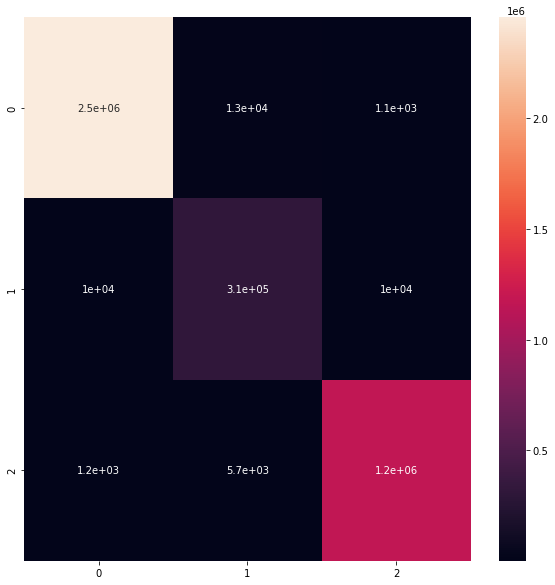

In [ ]:
from sklearn.metrics import confusion_matrix
#y_pred = model_1DCNN.predict(X_test)

cm = classifiation_analyse(true, pred)

plt.figure(figsize= (10, 10))
sns.heatmap(cm, annot=True)

rapport = classification_analyse_report(cm)

scores = pd.DataFrame.from_dict(rapport, orient ='index', columns = ['Precison', 'Rappel', 'f1-score', 'Support'])

scores.to_csv('eti/bilstm_hot.csv')

scores

-------